In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fruits = np.load('fruits.npy')

print(fruits.shape)  # (1470,100,00)  <-- (샘플개수, 이미지높이, 이미지 너비)




(1470, 100, 100)


In [18]:
fruits_2d = fruits.reshape(-1,100*100) # (샘플개수,너비높이 곱)

print(fruits_2d.shape)

(1470, 10000)


In [19]:
from sklearn.decomposition import PCA  # decompose: 분해되다, 분해하다  # decomposition: 분해

pca = PCA(n_components=50, random_state=42)  #   components <-- 요소, 부품
# the number of components <-- ~~ 의 갯수 (요소의 갯수)

pca.fit(fruits_2d)   # 주어진 데이터에 모델을 피팅(Fitting) 시킨다.  ==  모델을 학습시킨다.


PCA(n_components=50, random_state=42)

In [20]:
print(pca.components_.shape)

(50, 10000)


In [21]:
def draw_fruits(arr, ratio=1): # 대충 과일 그리는 함수  # ratio 크기
    n = len(arr)
    
    rows = int(np.ceil(n / 10))  # ceil 올림함수
    if rows < 2:
        cols = n
    else:
        cols = 10
    
#     cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize=(cols * ratio, rows * ratio),squeeze=False)  # (1, 2) --> (2, )
    for j in range(rows):
        for k in range(cols):
            if j * 10 + k < n:
                axs[j, k].imshow(arr[j * 10 + k], cmap = 'gray_r')
    
            axs[j, k].axis('off')
        
    plt.show()
    

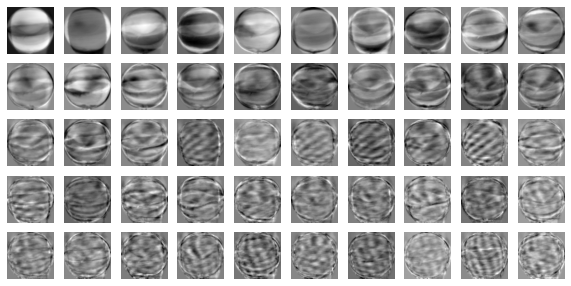

In [22]:
draw_fruits(pca.components_.reshape(-1,100,100))  # 첫번째로 큰 분순부터 50번째로 큰 분산표현

In [23]:
print(fruits_2d.shape)

(1470, 10000)


In [24]:
fruits_pca = pca.transform(fruits_2d)

print(fruits_pca.shape)

(1470, 50)


In [25]:
np.save('fruits_pca.npy', fruits_pca)

In [26]:
fruits_inverse = pca.inverse_transform(fruits_pca)  # inverse : 역 , 반대  원본방향으로 다시 바꿔라
print(fruits_inverse.shape)

(1470, 10000)


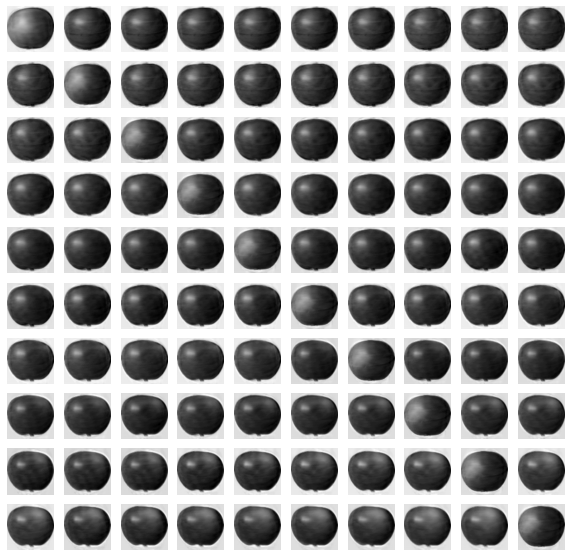

In [27]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)   # reconstruct 재 구성하다

draw_fruits(fruits_reconstruct[0:100])

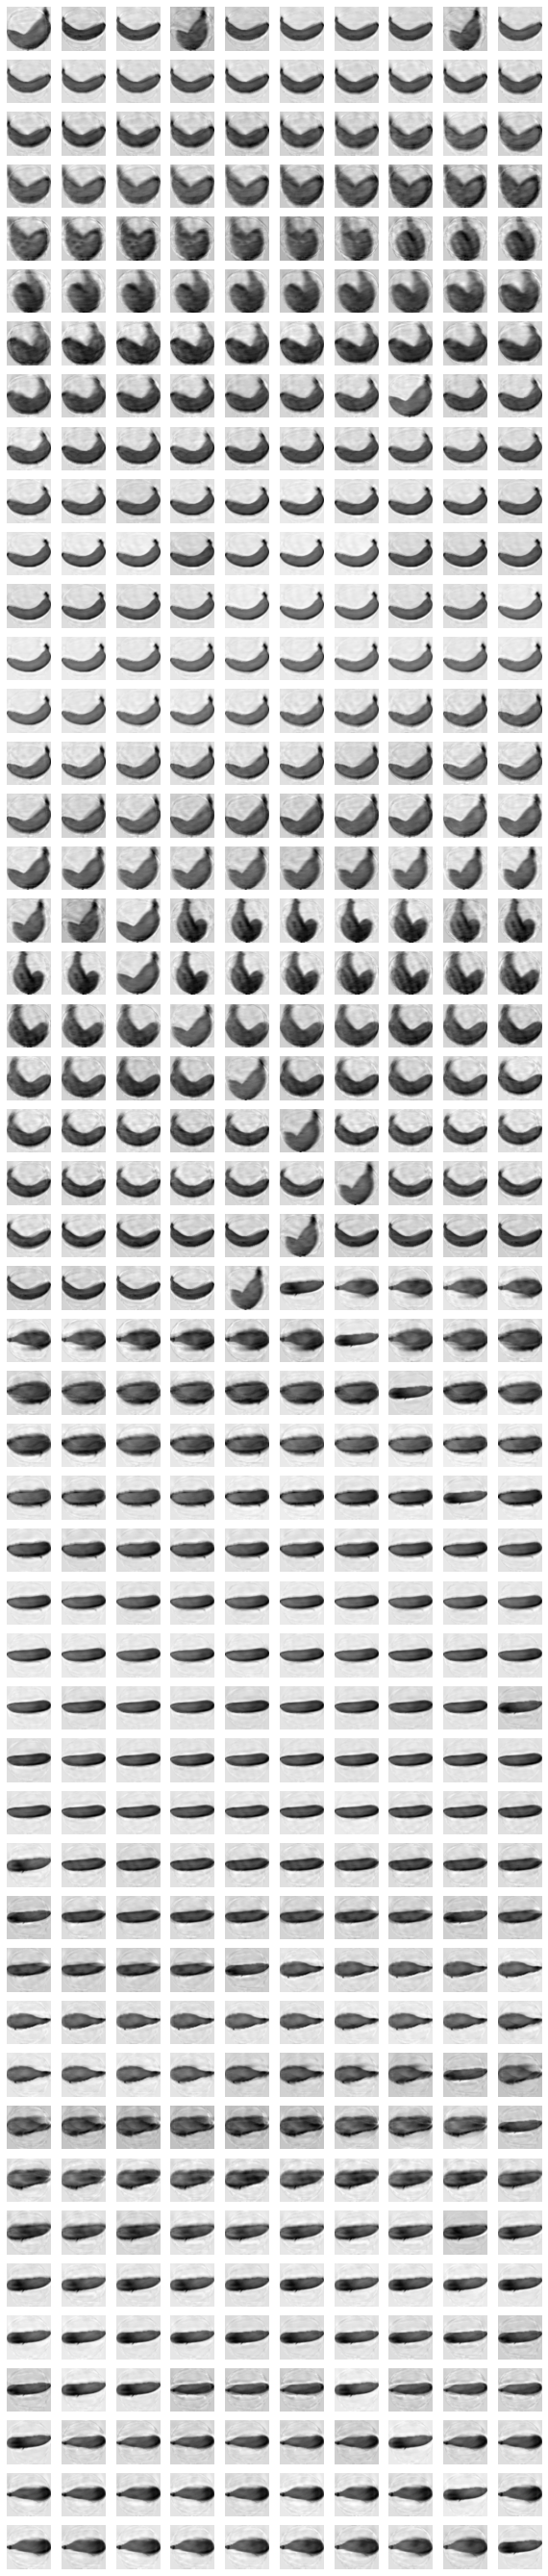

In [28]:
draw_fruits(fruits_reconstruct[490:980])

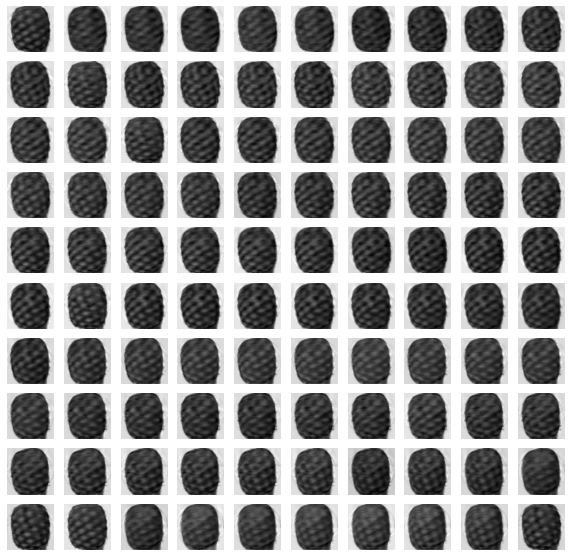

In [29]:
draw_fruits(fruits_reconstruct[980:1080])

In [30]:
# 10000 --> 50 (1/200)
# 10000 --> 100, 500 ,1000
# 50개로 축소!
# 분산이 얼마나 잘 보존이 되었는가?
# 설명된 분산 (Explained Variance)

print(pca.explained_variance_ratio_)


[0.5586464  0.11552605 0.05540004 0.04191264 0.01991335 0.01769261
 0.01411554 0.0112748  0.00895842 0.00870518 0.00713342 0.00686132
 0.00618506 0.00535607 0.00464428 0.00400779 0.00370881 0.00350107
 0.00305945 0.00289259 0.00268067 0.00253049 0.00224965 0.00211854
 0.00204749 0.00195585 0.00189895 0.00181368 0.00170509 0.00161984
 0.00161301 0.00150683 0.00142024 0.00138603 0.0013387  0.00129986
 0.00120126 0.00119241 0.00113076 0.00111703 0.00106367 0.00104272
 0.0010082  0.00097555 0.00095413 0.00090935 0.00088528 0.00087457
 0.00084814 0.00081988]


In [32]:
print(np.sum(pca.explained_variance_ratio_))

0.9427027724493615


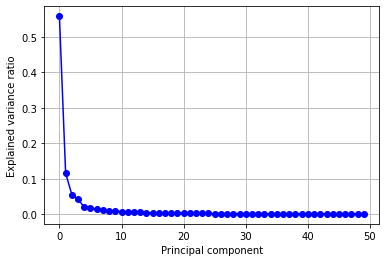

In [40]:
plt.plot(pca.explained_variance_ratio_, '-o', color='b')
plt.xlabel('Principal component')
plt.ylabel('Explained variance ratio')
plt.grid(True)

plt.show()

In [46]:
pca = PCA(n_components=0.6)  # 0~1 사이의 실수 값을 적을 수 있음!  # 분산 60% 를 찾아라?
pca.fit(fruits_2d)

PCA(n_components=0.6)

In [47]:
print(pca.n_components_)  # 찾아낸 주성분

2


In [48]:
fruits_pca = pca.transform(fruits_2d)

print(fruits_pca.shape)  # (1470, 2)    10000차원 ->  2차원 

(1470, 2)


In [50]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)  # 원래는 n_clusters도 찾아야 됨  그때 쓰는게 엘보우 방법

km.fit(fruits_pca)

print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2]), array([727, 490, 253], dtype=int64))


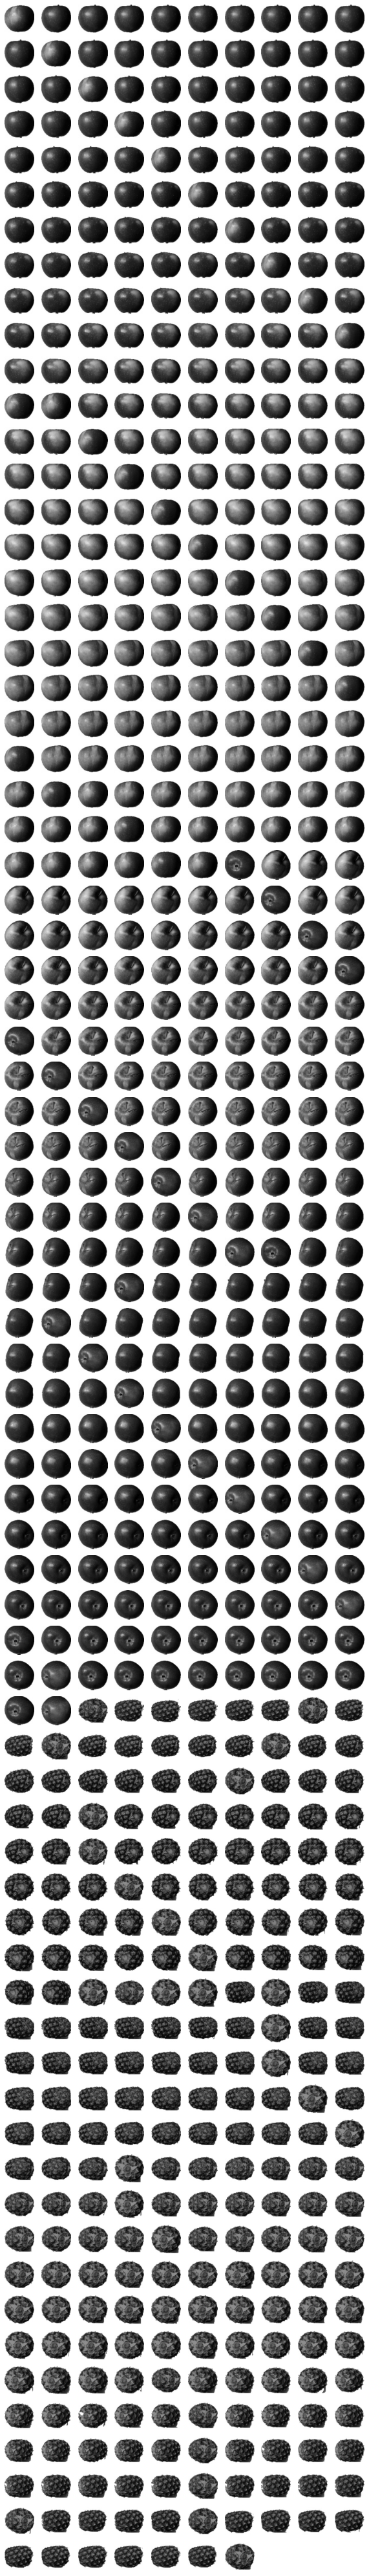

In [51]:
draw_fruits(fruits[km.labels_ == 0])

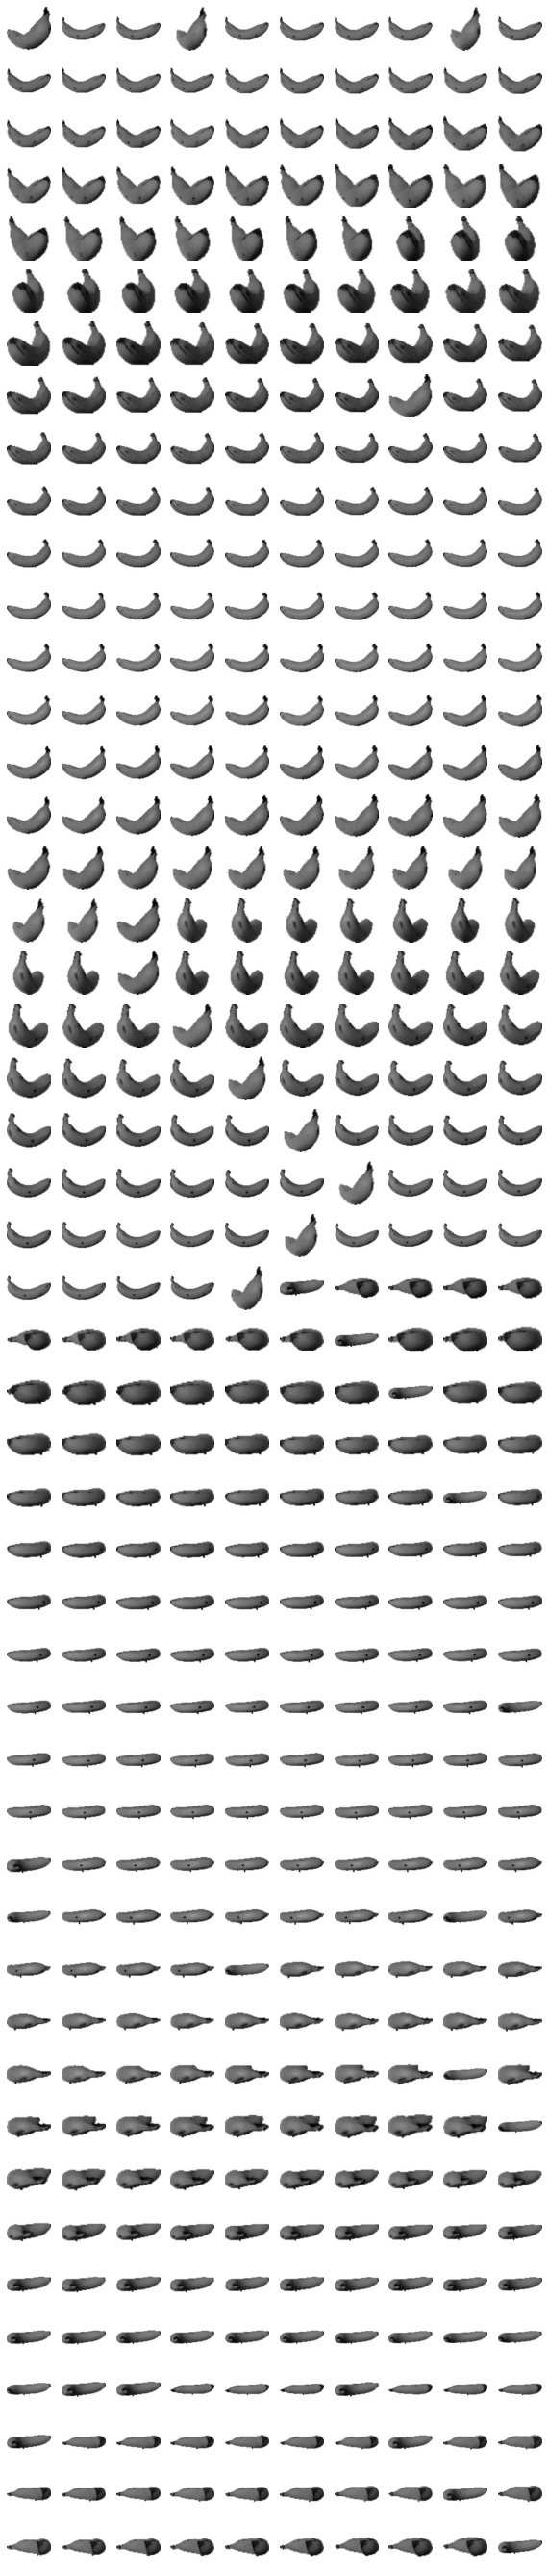

In [52]:
draw_fruits(fruits[km.labels_ == 1])

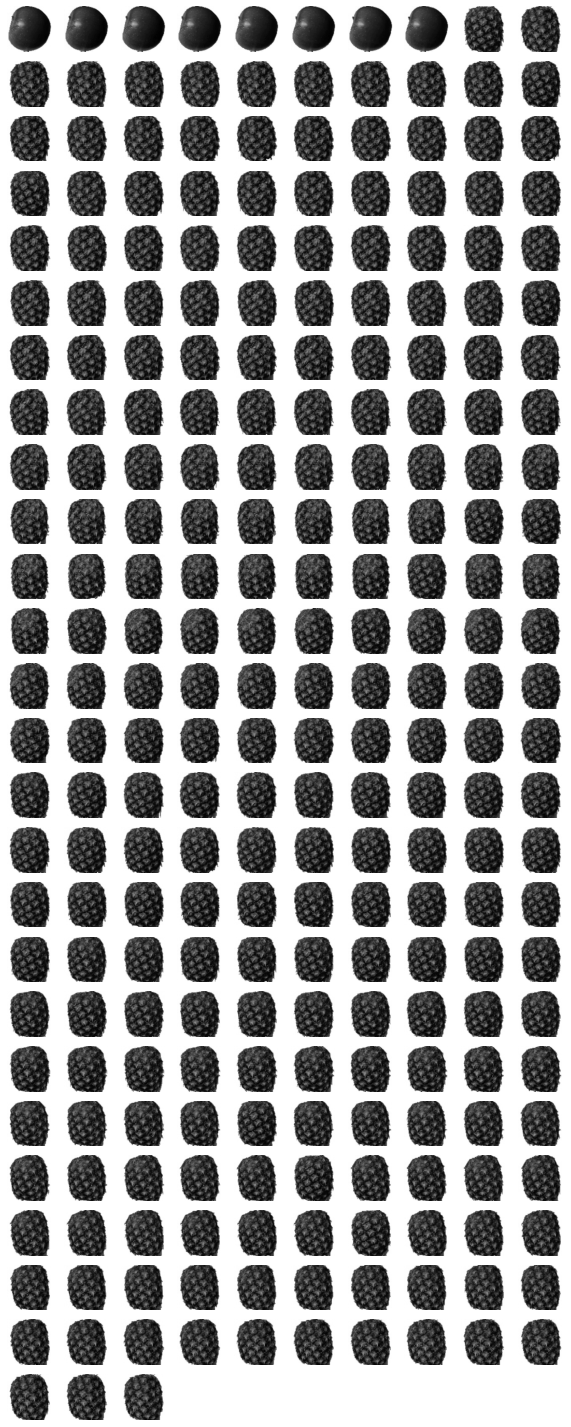

In [53]:
draw_fruits(fruits[km.labels_ == 2])

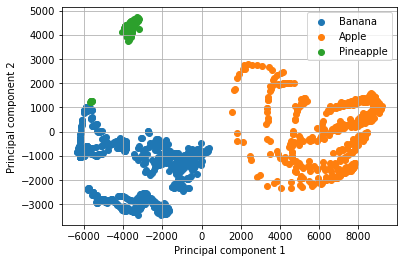

In [55]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:, 0], data[:, 1])
    
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.legend(['Banana','Apple','Pineapple'])
plt.grid(True)
plt.show()

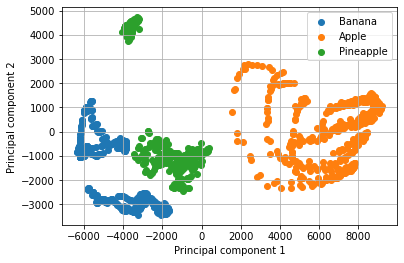

In [57]:
plt.scatter(fruits_pca[:490, 0], fruits_pca[:490, 1])
plt.scatter(fruits_pca[490:980, 0], fruits_pca[490:980, 1])
plt.scatter(fruits_pca[980:, 0], fruits_pca[980:, 1])

plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.legend(['Banana','Apple','Pineapple'])
plt.grid(True)
plt.show()